## **Importing the necessary libraries**

In [1]:
# Library used for data manipulation and analysis
import pandas as pd

# Library used for working with arrays
import numpy as np  

# Libraries for visualization
import matplotlib.pyplot as plt  
%matplotlib inline

import seaborn as sns  

# This library contains a large number of probability distributions as well as a growing library of statistical functions
import scipy.stats as stats

## **Binomial Distribution**

### **Q1. A LED bulb manufacturing company regularly conducts quality checks at specified periods on the products it manufactures. Historically, the failure rate for LED light bulbs, that the company manufactures is 5%. Suppose a random sample of 10 LED light bulbs is selected. Find the probability distribution for the defective bulbs and answer the following questions.**

**a) What is the probability that none of the LED bulbs are defective?**

In [5]:
from scipy.stats import binom #Binomial Bernouli distribution because we are looking at success vs failure
n = 10 #number of random samples
p = 0.05 #probability of a defective sample
k = 0 #target of zero defective items in the sample
binomial = binom.pmf(k, n, p)
print(binomial)

0.5987369392383789


**b) What is the probability that exactly one LED bulb is defective?**

In [ ]:
k2 = 1
binomial2 = binom.pmf(k2, n, p)
print(binomial2)

**c) What is the probability that two or fewer LED bulbs are defective?**

**Hint:** We need to calculate the cumulative probability of two or fewer LED bulbs being defective.

In [7]:
maxbinom = binom.cdf(2, n, p)
print(maxbinom)

0.9884964426207031


**d) What is the probability that three or more LED bulbs are defective?**

**Hint:** We need to subtract the cumulative probability of up to 2 defective LED bulbs from 1.

In [8]:
minbinom = 1 - binom.cdf(2, n, p)
print(minbinom)

0.01150355737929687


### **Q2. During an NBA game, a basketball player has two foul shots (free throw) and the conversion rate of foul shots is 93%. Find the following probabilities.**

**a) What is the probability that the player will convert both the shots?**

In [13]:
n = 2
p = .93
conversionProbability = binom.pmf(2, n, p)
print(conversionProbability)

0.8649000000000001


**b) What is the probability that the player will convert at least one shot?**

In [18]:
conversionProbability = 1 - binom.pmf(0, n, p)
print(conversionProbability)

0.9951


### **Q3. Over a long period in a large multinomial corporation, 10% of all sales trainees are rated as outstanding, 75% are rated as excellent, 10% are rated as satisfactory, and 5% are rated as unsatisfactory. Find the following probabilities for a sample of 10 trainees selected at random.**

**a) Two are rated as outstanding**

In [19]:
p1 = .1 #Outstanding
p2 = .75 #Excellent
p3 = .1 #Satisfactory
p4 = .05 #Unsatisfactory
n = 10 #Number of Samples

probabilityOfTwoOutstanding = binom.pmf(2,n,p1)
print(probabilityOfTwoOutstanding)

0.19371024450000005


**b) Two or more are rated as outstanding**

In [20]:
probabilityOfTwoOrMoreOutstanding = 1 - binom.cdf(1, n, p1)
print(probabilityOfTwoOrMoreOutstanding)

0.2639010708999998


**c) Eight of the ten are rated either outstanding or excellent**

In [21]:
probabilityOfEightOutstandingOrExcellent = binom.pmf(8, n, (p1 + p2))
print(probabilityOfEightOutstandingOrExcellent)

0.27589665660205087


**d) None of the trainees are rated as unsatisfactory**

In [22]:
probabilityNoUnsatisfactory = binom.pmf(0, n, p4)
print(probabilityNoUnsatisfactory)

0.5987369392383789


## **Uniform Distribution**

### **Q4. A university records the time taken by students to solve the statistics assignment in 'assignment.csv’. Plot the probability distribution this data follows and answer the following questions.**

### **Loading the dataset**

In [23]:
assignment = pd.read_csv('assignment.csv')

assignment.head()

,Student_ID,Time_taken
0,955,2.79
1,379,3.32
2,922,1.35
3,312,2.35
4,670,1.98


**a) Find the probability that a randomly selected student requires at most 2.5 hours to complete the assignment.**

**CDF** of a random variable (X) is the probability that X will take the value less than or equal to x. Mathematically, it can be represented as:

>$F_X(x) = P(X\leq x)$

In our case, the random variable (X) is the number of hours.

$ P(X\leq 2.5)$

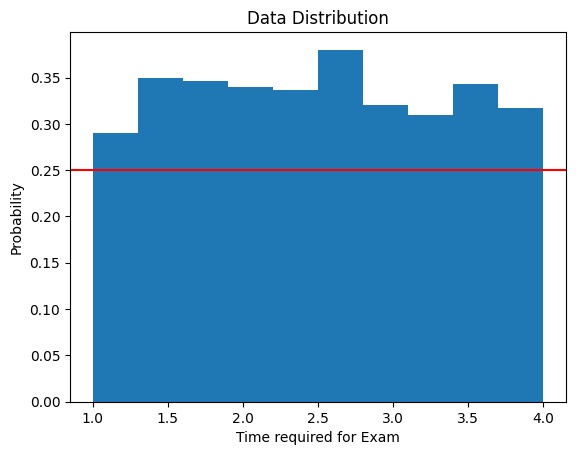

0.375


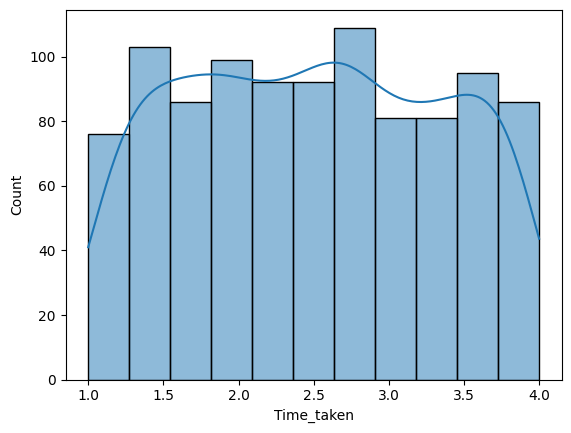

In [32]:
from scipy.stats import uniform
q = 2.5
n = len(assignment['Time_taken'])
x = assignment['Time_taken']


# visualize the distribution of the time needed for bug fixing
plt.hist(assignment['Time_taken'], density=True)
plt.axhline(1 / 4, color="red")
plt.xlabel("Time required for Exam")
plt.ylabel("Probability")
plt.title("Data Distribution")
plt.show()


sns.histplot(assignment['Time_taken'], kde=True)

z = np.linspace(1, 4, 50)
probs = uniform.pdf(z, loc=1, scale=4)

print(uniform.cdf(x = q, loc=1, scale=4))

**b) Find the probability that a randomly selected student requires at least 3 hours to complete the quiz.**

$ P(X >= 3)$

In [34]:
print((1 - uniform.cdf(x = 2, loc = 1, scale = 4)))

0.75


**c) Find the probability that a randomly selected student requires 1.5 to 3.5 hours to complete the quiz.**

$ P(1.5 <= X <= 3.5)$

In [35]:
x1 = uniform.cdf(1.5, 1, 4)
x2 = uniform.cdf(3.5, 1, 4)

print(x2 - x1)

0.5


## **Normal Distribution**

### **Q5. According to the Telecommunication Industry, the average monthly cell phone bill is Rs. 850, with a standard deviation of Rs. 150. Assuming that the monthly bill follows a normal distribution, answer the following questions.**

**a) What is the probability that a randomly selected cell phone bill is more than Rs. 1200?**

In [38]:
from scipy.stats import norm
mu = 850
sigma = 150

probLess1200 = norm.cdf(1200, mu, sigma)
print(1 - probLess1200)

0.009815328628645315


**b) What is the probability that a randomly selected cell phone bill is between Rs. 750 and Rs. 1200?**

In [37]:
prob1 = norm.cdf(750, mu, sigma)
prob2 = norm.cdf(1200, mu, sigma)

print(prob2 - prob1)

0.7376921338244318


**c) What is the probability that a randomly selected cell phone bill is no more than Rs. 650?**

In [39]:
print(norm.cdf(651, mu, sigma))

0.09230948605882366


**d) What is the amount above which lies the top 15% of cell phone bills?**

**Hint:** Let the amount be $M$. 

$P(X ≥ M) = 0.15$

$=> 1 – P(X < M) = 0.15$

$=> P(X < M) = 0.85$

In [40]:
pt = norm.ppf((1 - .15), mu, sigma)
print(pt)

1005.4650084240685


**e) What is the amount below which lies the bottom 25% of cell phone bills?**

In [41]:
print(norm.ppf(.25, mu, sigma))

748.8265374705877


### **Q6. The mean filling capacity for a Coke bottle is 500 ml with a standard deviation of 20 ml. Assume that it follows a normal distribution and answer the following questions.**

**a) What is the probability that the bottle filled less than 480 ml of Coke?**

In [43]:
mu = 500
sigma = 20

print(norm.cdf(480, mu, sigma))

0.15865525393145707


**b) What is the probability that the bottle filled more than 520 ml of Coke?**

In [44]:
print((1 - norm.cdf(520, mu, sigma)))

0.15865525393145707


**c) What is the probability that the bottle filled between 470 ml to 525 ml of Coke?**

In [45]:
p1 = norm.cdf(470, mu, sigma)
p2 = norm.cdf(525, mu, sigma)
print(p2 - p1)

0.8275430250642866


### Q7: **In 2-liter soft drink bottles, the drink filled is normally distributed, with a mean of 2.0 liters and a standard deviation of 0.05 liter. If bottles contain less than 95% of the listed net content (1.90 liters), the manufacturer may be subject to a penalty by the state office of consumer affairs. Bottles that have a net quantity above 2.1 liters may cause excess spillage upon opening. Answer the following questions.**

**a) What is the probability that the bottle content is between 1.9 and 2.0 liters?**

In [47]:
mu = 2
sigma = 0.05
p1 = norm.cdf(1.9, mu, sigma)
p2 = norm.cdf(2, mu, sigma)
print(p2 - p1)

0.4772498680518209


**b) What is the probability that the bottle content is between 1.9 and 2.1 liters?**

In [48]:
p3 = norm.cdf(2.1, mu, sigma)
print (p3 - p1)

0.9544997361036418


**c) What is the probability that the bottle content is below 1.9 liters or above 2.1 liters?**

In [49]:
p4 = (1 - p3)
print(p1 + p4)

0.045500263896358195


**d) 99% of the bottles contain at least what amount of soft drink in them?**

In [50]:
print(norm.ppf(.99, mu, sigma))

2.116317393702042


## **Sampling Distribution**

### **Q8. Suppose an automobile battery manufacturer claims that the mean lifetime of their battery is 60 months with a standard deviation of 6 months. Suppose the distribution of battery life is approximately normal. Find the probability that the mean lifetime of 40 randomly sampled batteries will be less than 58 months.**

## **Interval Estimation**

### **Q9. A random sample of 40 households was selected as part of a study on electricity usage, and the number of kilowatt-hours (kWh) was recorded for each household in the sample for the first quarter of 2022. The average usage was found to be 310 kWh. In a very large study in the first quarter of the previous year, it was found that the standard deviation of the usage was 89 kWh.**

### **Assuming the standard deviation is unchanged and that the usage is normally distributed, provide an expression for calculating the 95% confidence interval for the mean usage in the first quarter of 2022.**

## **Hypothesis Testing**

### **Q10. You are the manager of a Chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. State the null and alternative hypothesis.**

### **Q11. Find the p-value of a two-tailed hypothesis test if the Z-stat = +2.00?**